# <font color=Red>Big Data Mart Sales Problem</font>

Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

 # <span style='background :yellow' > Importing Libraries </span>

In [170]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams  # for plotting box plot, to check outliers
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # for scaling
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [171]:
df_train = pd.read_csv("bigdatamart_Train.csv")
df_test  = pd.read_csv("bigdatamart_Test.csv")


In [172]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [173]:
df_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [174]:
df_train.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4767,FDN44,NaN,Low Fat,0.022685,Fruits and Vegetables,161.5920,OUT027,1985,Medium,Tier 3,Supermarket Type3,4314.3840
8072,FDK25,11.60,Regular,0.156802,Breakfast,168.0474,OUT035,2004,Small,Tier 2,Supermarket Type1,4379.6324
5695,DRH23,14.65,Low Fat,0.170664,Hard Drinks,56.4614,OUT045,2002,NaN,Tier 2,Supermarket Type1,1436.7964
11,FDA03,18.50,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
777,FDK26,5.46,Regular,0.032171,Canned,184.8240,OUT035,2004,Small,Tier 2,Supermarket Type1,4287.7520
7124,FDM03,NaN,Low Fat,0.000000,Meat,109.1938,OUT027,1985,Medium,Tier 3,Supermarket Type3,2036.6822
4599,FDW48,NaN,Low Fat,0.000000,Baking Goods,81.8618,OUT019,1985,Small,Tier 1,Grocery Store,161.1236
340,FDY49,NaN,Regular,0.011954,Canned,164.5184,OUT027,1985,Medium,Tier 3,Supermarket Type3,2807.0128
519,NCJ54,NaN,Low Fat,0.059776,Household,231.7642,OUT027,1985,Medium,Tier 3,Supermarket Type3,5344.3766
324,FDB45,20.85,Low Fat,0.021363,Fruits and Vegetables,103.2306,OUT049,1999,Medium,Tier 1,Supermarket Type1,2404.2038


In [175]:
df_train.shape 

(8523, 12)

In [176]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [177]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [178]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Regarding problem statement output variable in continuous number. So it is regression problem. Item outlet sales is our target

# <span style='background :yellow' > Check the duplicate the value </span>

In [179]:

duplicated_values = df_train.duplicated()
print(duplicated_values.sum())

0


# <span style='background :yellow' > Check unique values in dataset </span>

In [180]:
df_train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# <span style='background :yellow' > Preprocessing the dataset </span>

# <span style='background :yellow' > Checking Null Values </span>

In [181]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Since there is two missing value prsesnt in dataframe
### 1.Item weight
### 2.outlet_Size

In [182]:
#filling  missing values with mean value

## Here we will check the percentage of nan values present in each feature

### list of features which has missing values

In [183]:
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df_train[feature].isnull().mean(), 4),  ' % missing values')

Item_Weight 0.1717  % missing values
Outlet_Size 0.2828  % missing values


## Finding the Relation between missing value and dependent variable

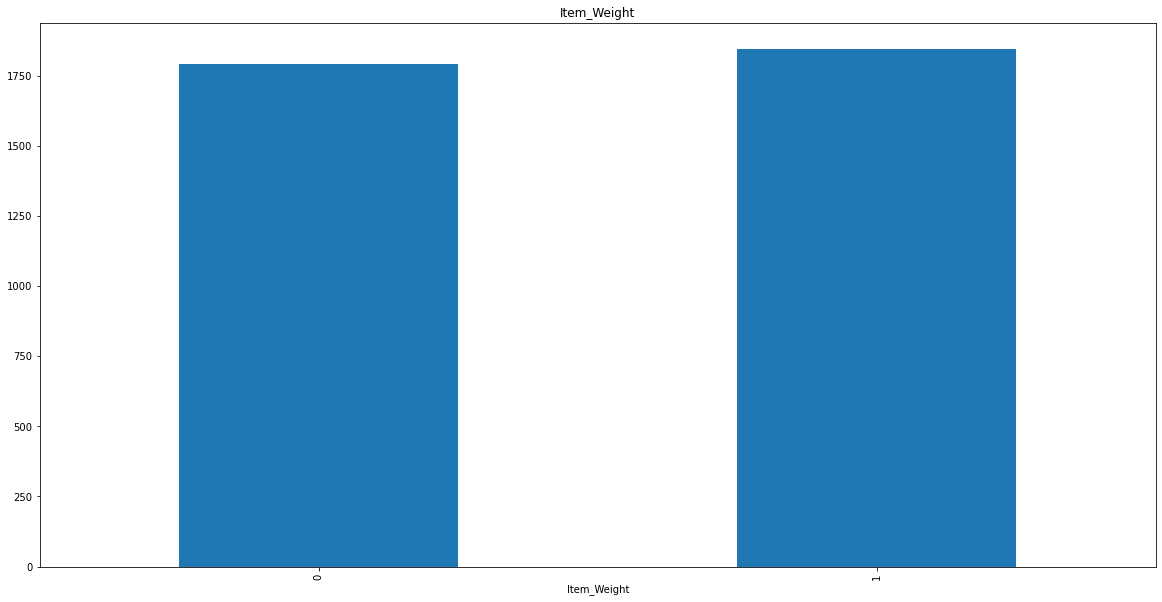

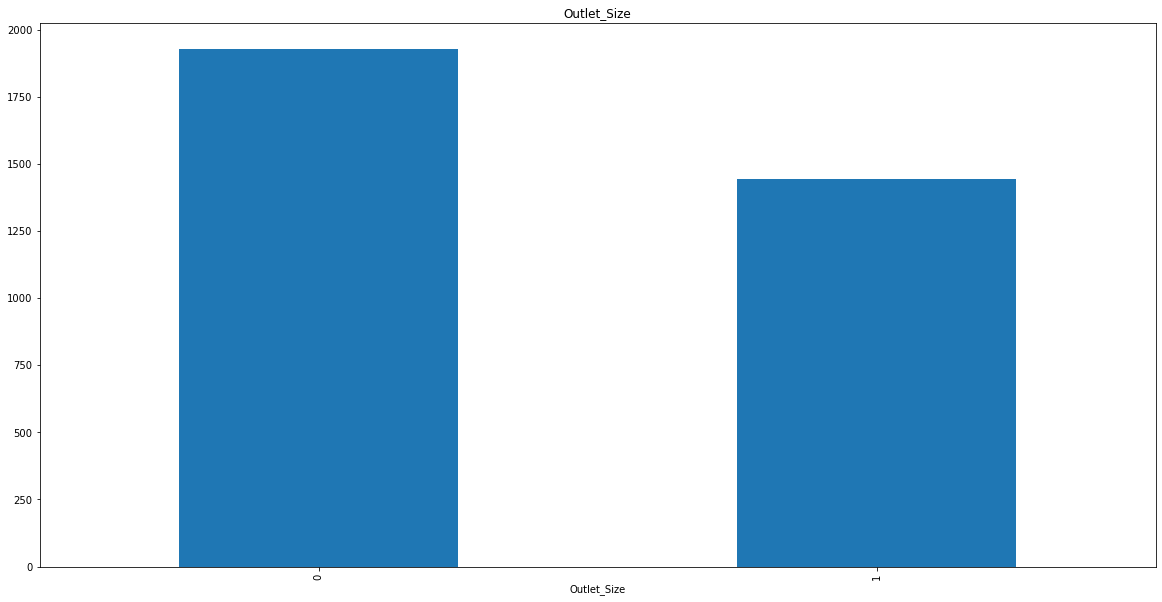

In [184]:
for feature in features_with_na:
    data = df_train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.title(feature)
    plt.show()

from above graph it clears that outletsize have greter impact over the Sales,
Similary outlet size have medium impact over the sales

Here With the relation between the missing values and the dependent variable is clearly visible.
So We need to replace these nan values with something meaningful.

In [185]:
item_weight_mean = df_train.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [186]:
miss_bool = df_train['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [187]:
for i, item in enumerate(df_train['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df_train['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df_train['Item_Weight'][i] = np.mean(df_train['Item_Weight'])

In [188]:
df_train['Item_Weight'].isnull().sum()

0

In [189]:
outlet_size_mode = df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [190]:
miss_bool = df_train['Outlet_Size'].isnull()
df_train.loc[miss_bool, 'Outlet_Size'] = df_train.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [191]:
df_train['Outlet_Size'].isnull().sum()

0

### From dataset is observed that outlet size column have more value of zero

## Checking null values in our Item_Visibility coloumn

In [192]:
sum(df_train['Item_Visibility']==0)

526

## Replacing null value with mean value

In [193]:
df_train.loc[:, 'Item_Visibility'].replace([0], [df_train['Item_Visibility'].mean()], inplace=True)

In [194]:
sum(df_train['Item_Visibility']==0)

0

# <span style='background :orange' > Now our dataset is null value free </span> 

## <span style='background :white'>Checking the type of vaiable in our dataset </span> 

## <span style='background :yellow' > Numerical Variables </span>

In [195]:
# list of numerical variables
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_train[numerical_features].head()

Number of numerical variables:  5


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.066132,182.0950,1998,732.3800
4,8.93,0.066132,53.8614,1987,994.7052


In [196]:
df_train['New_Item_Type'] = df_train['Item_Identifier'].apply(lambda x: x[:2])
df_train['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [197]:
df_train['New_Item_Type'] = df_train['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df_train['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [198]:
df_train.loc[df_train['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df_train['Item_Fat_Content'].value_counts()

Low Fat       3612
Regular       2889
Non-Edible    1599
LF             222
reg            117
low fat         84
Name: Item_Fat_Content, dtype: int64

# <span style='background :yellow' > Temporal Variables </span>

In [199]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['Outlet_Establishment_Year']

In [200]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, df_train[feature].unique())

Outlet_Establishment_Year [1999 2009 1998 1987 1985 2002 2007 1997 2004]


### # <span style='background :yellow' >  Relation between the outlet year establishment and item outlet sizes </span>

Text(0.5, 1.0, 'Year vs sales')

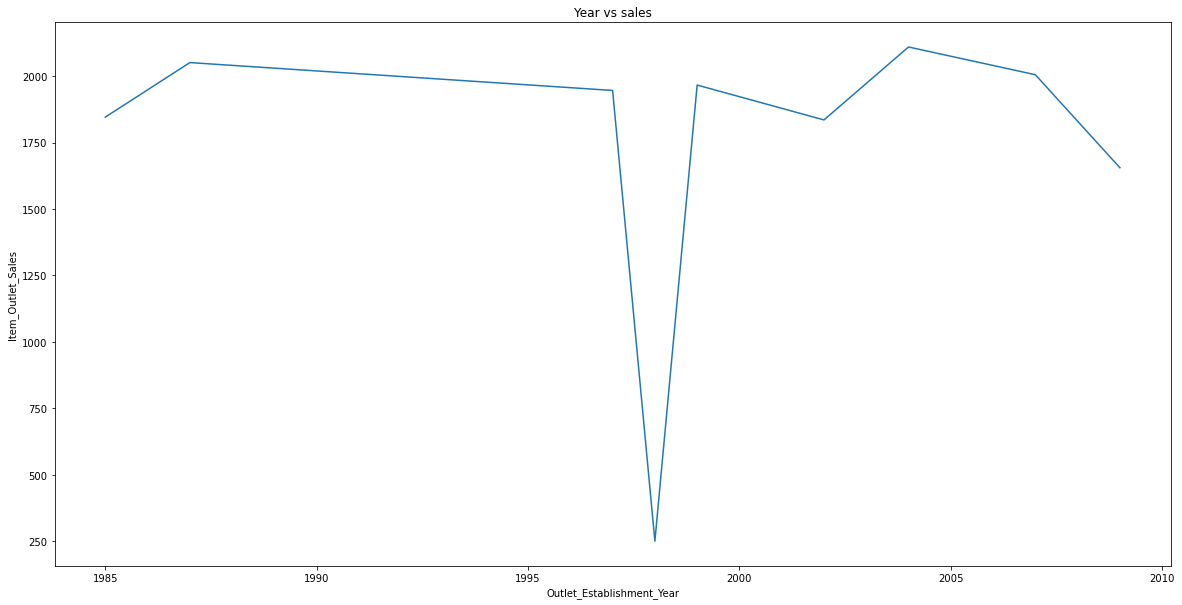

In [201]:
df_train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot()
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.title("Year vs sales")

## Observation,
### If we see item sales is not too much increased it
### its drop at in betwwen 1995 and 2000 year,
### At the End is sales is decreased

## <span style='background :yellow' > Discrete Variables </span>

In [202]:
discrete_feature=[feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


#### No discrate variable present 

## <span style='background :yellow' > Continuous Variables </span>

In [203]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


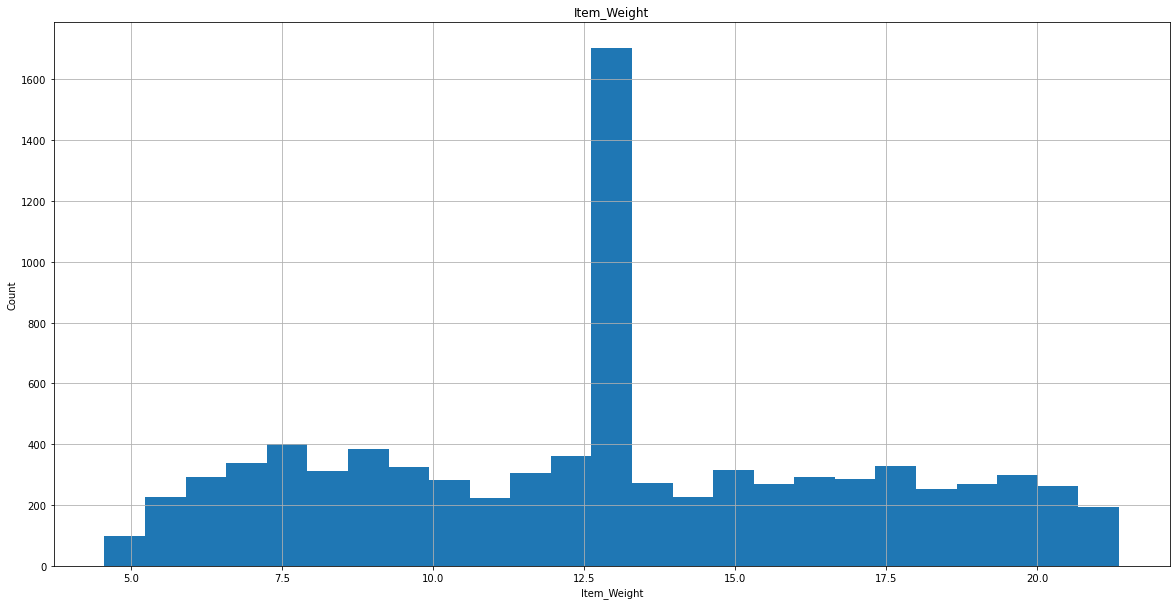

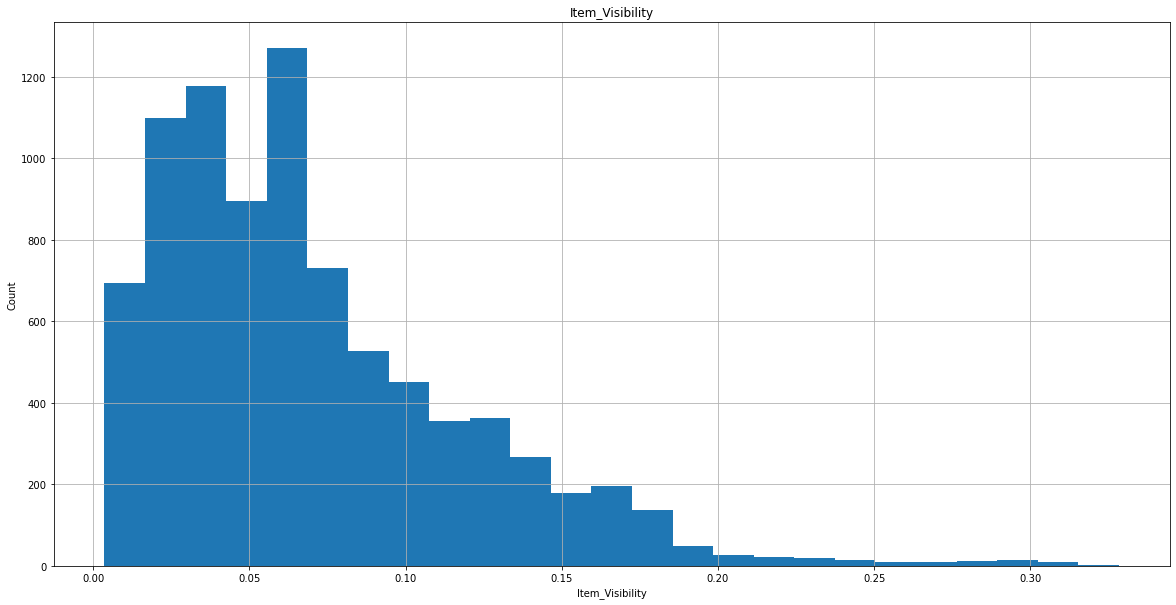

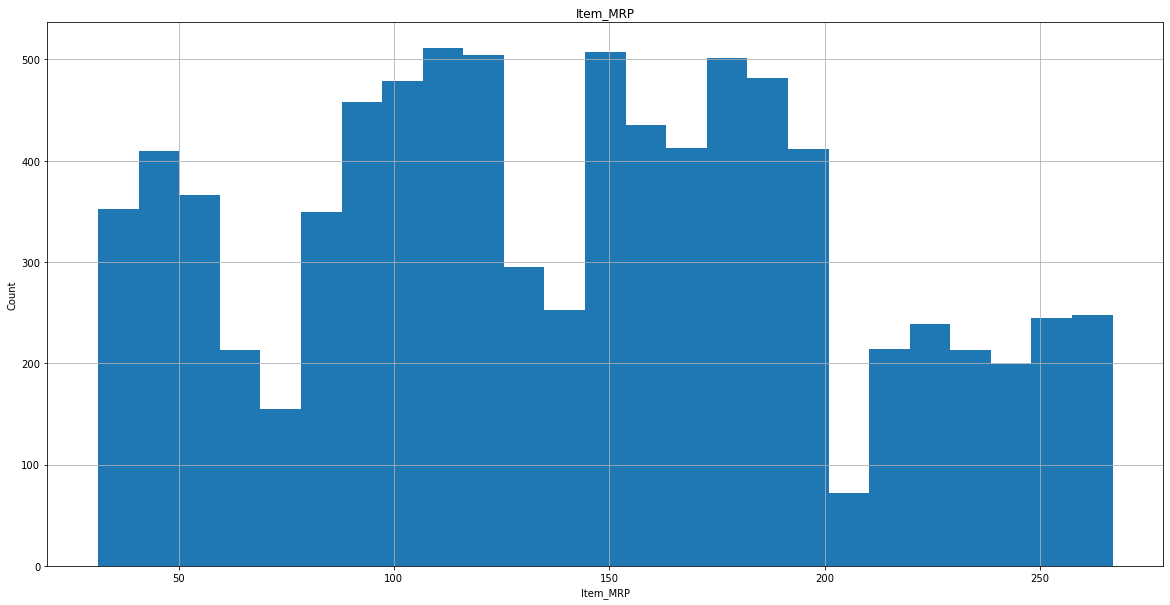

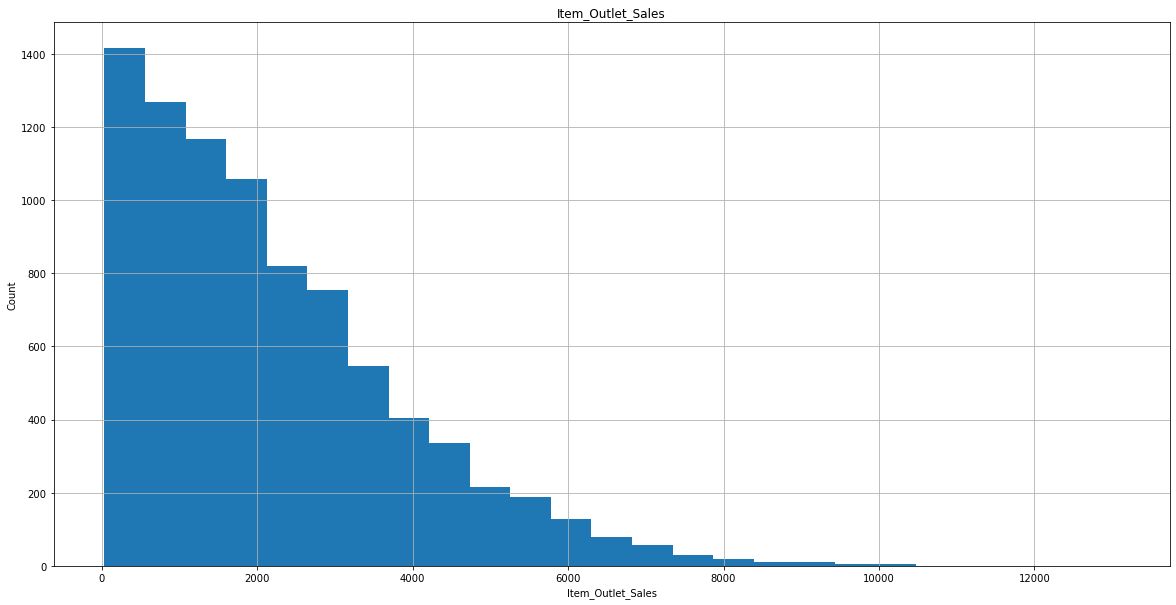

In [204]:
for feature in continuous_feature:
    data=df_train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

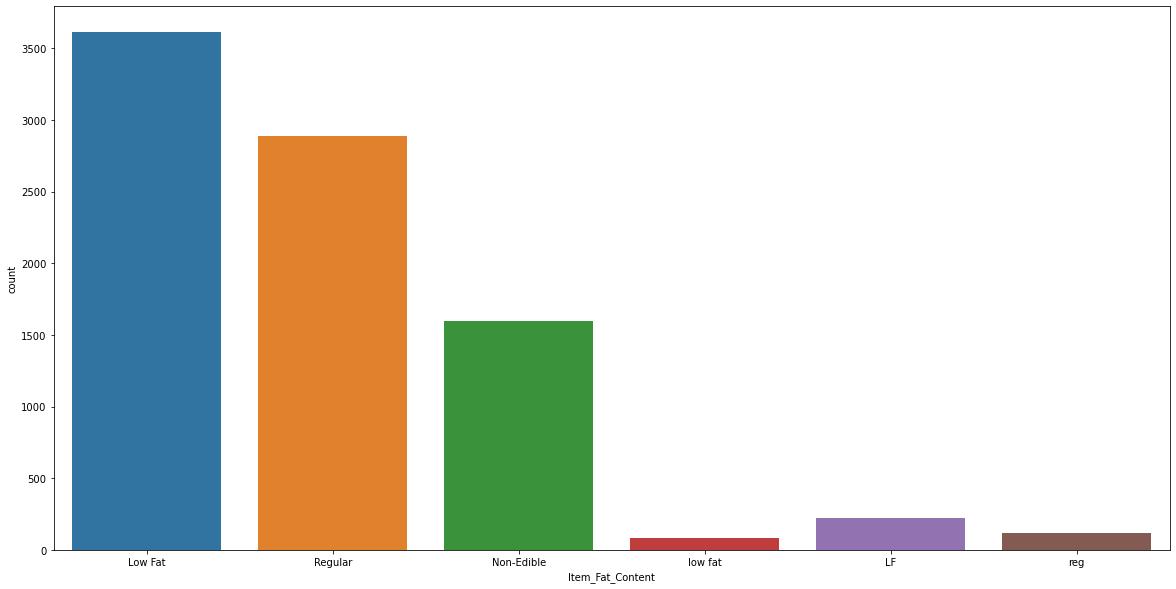

In [205]:
sns.countplot(df_train["Item_Fat_Content"])

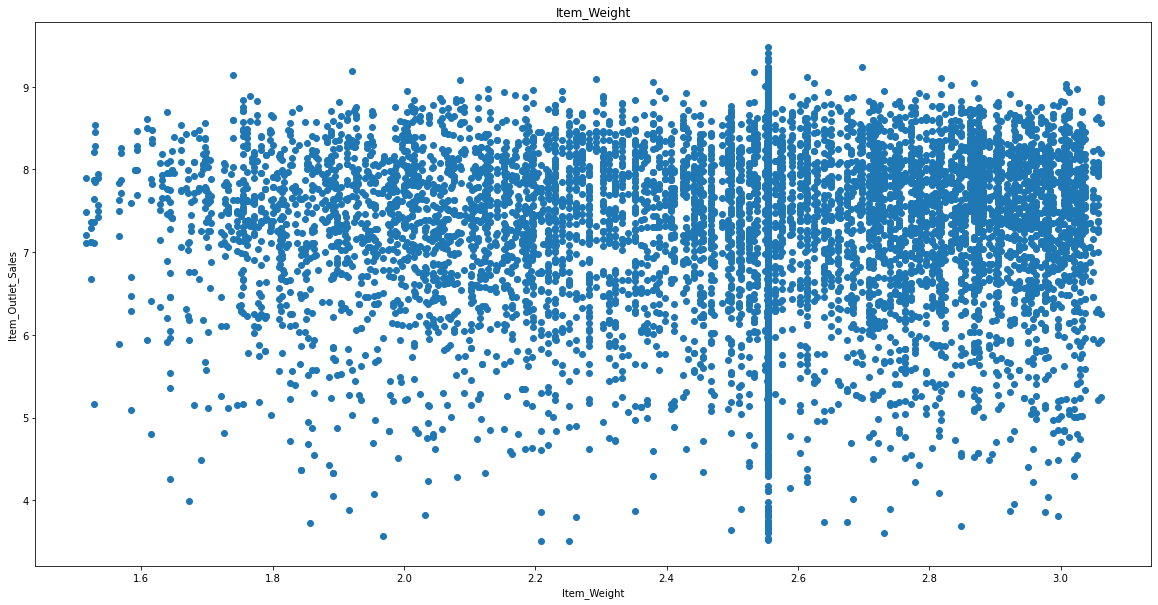

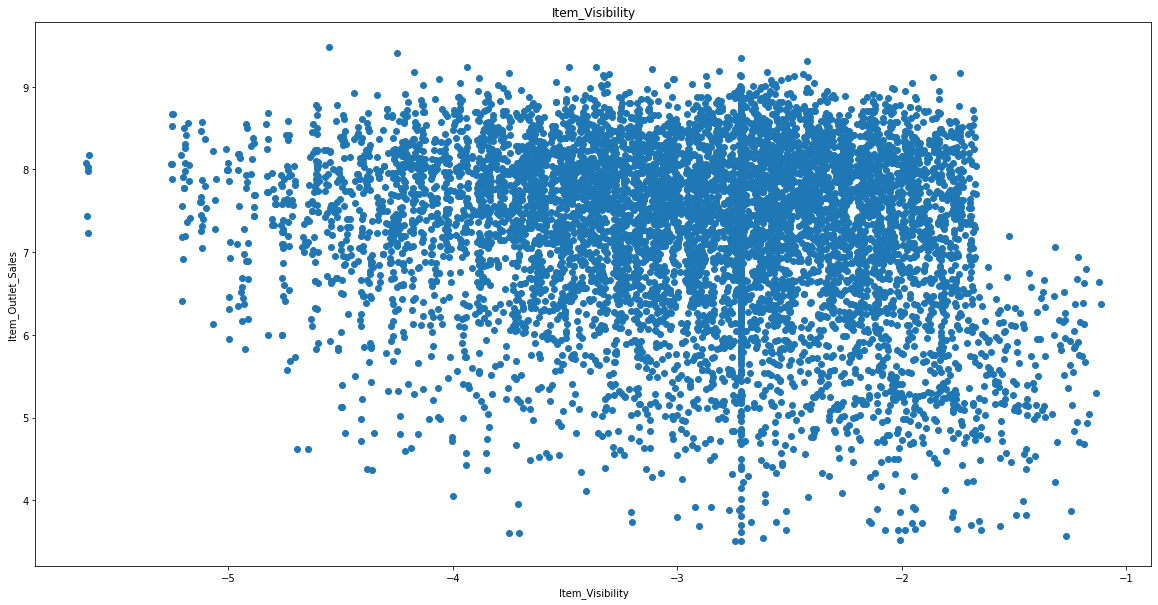

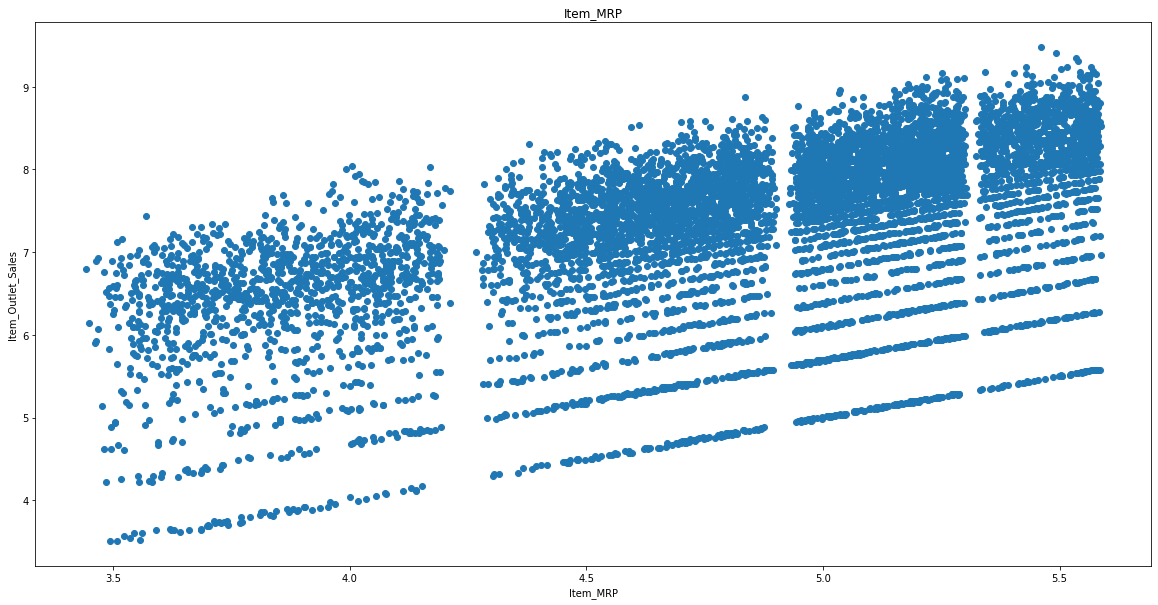

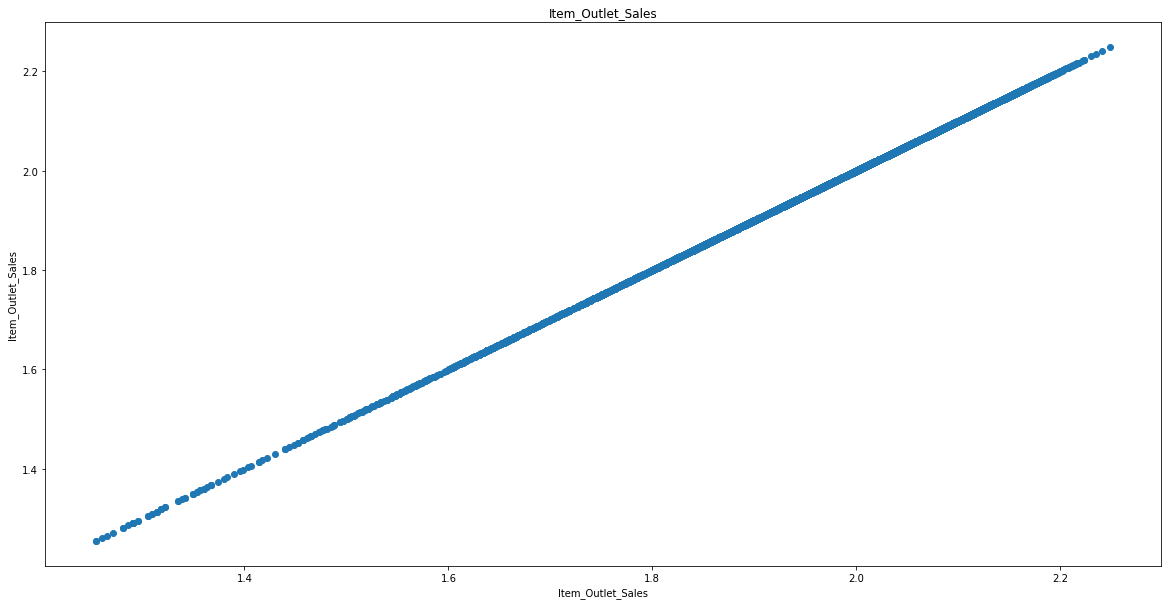

In [206]:
for feature in continuous_feature:
    data=df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Item_Outlet_Sales']=np.log(data['Item_Outlet_Sales'])
        plt.scatter(data[feature],data['Item_Outlet_Sales'])
        plt.xlabel(feature)
        plt.ylabel('Item_Outlet_Sales')
        plt.title(feature)
        plt.show()  


From the above plot its clear that item and item MRP are directly propotional to the item outletsales

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

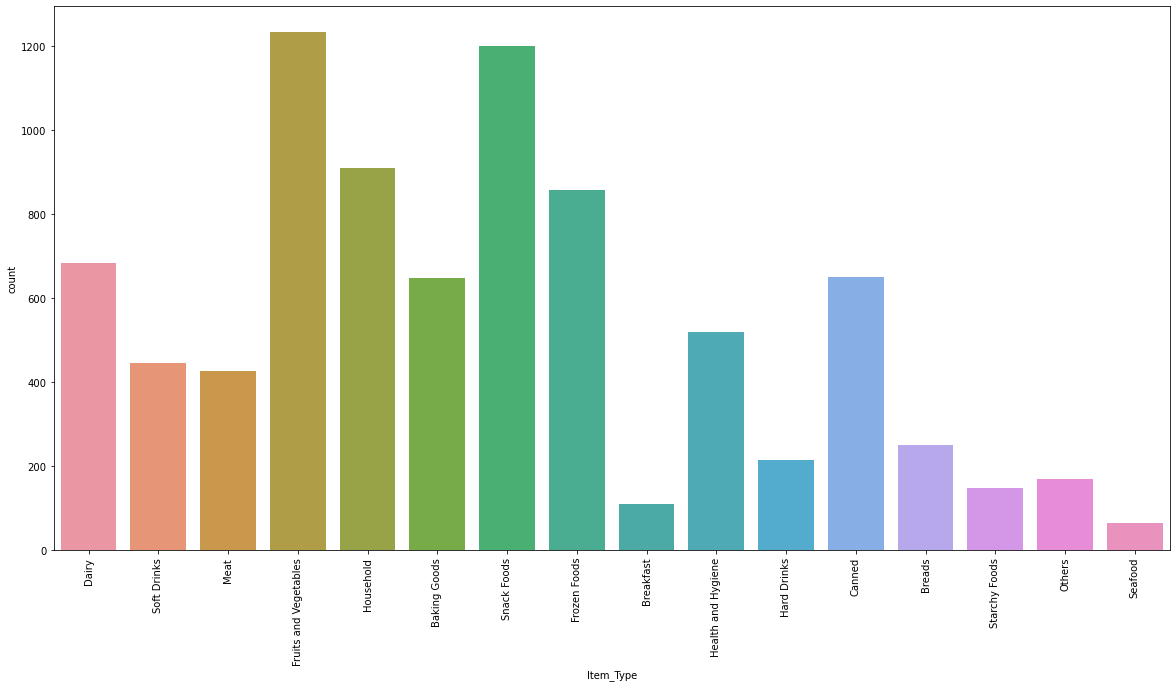

In [291]:
# plt.figure(figsize=(15,5))
l = list(df_train['Item_Type'].unique())
chart = sns.countplot(df_train["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

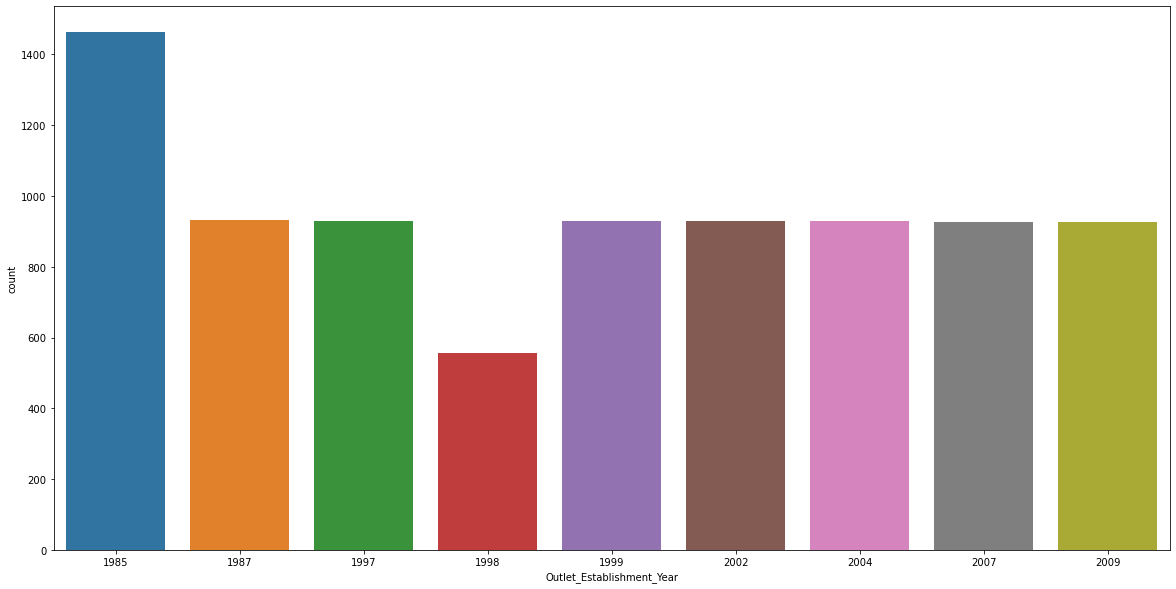

In [292]:
sns.countplot(df_train['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

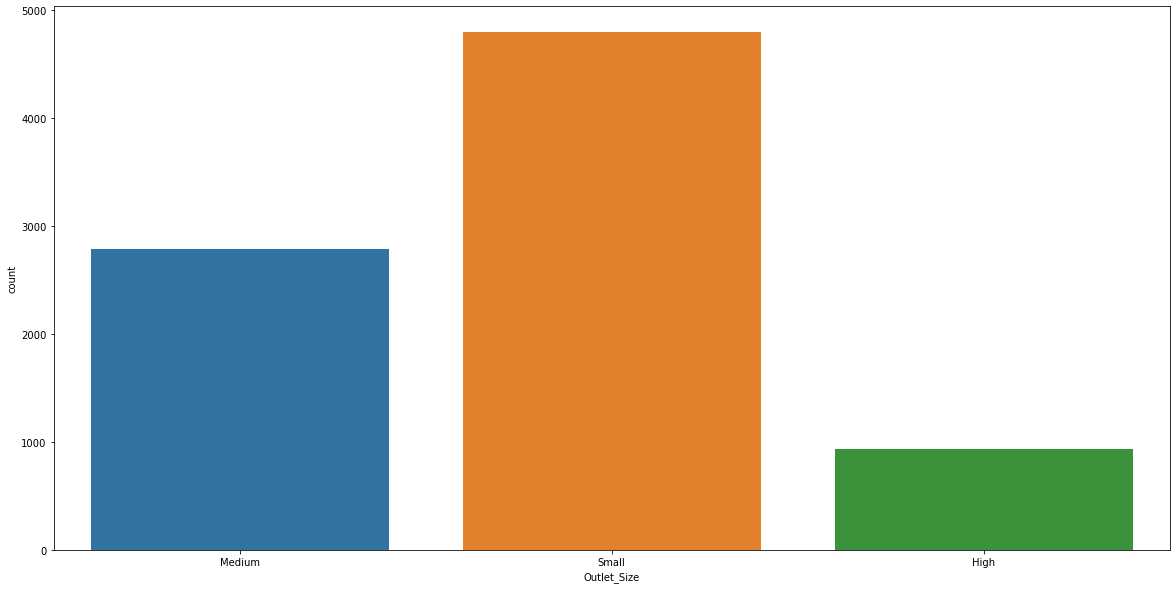

In [293]:
sns.countplot(df_train['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

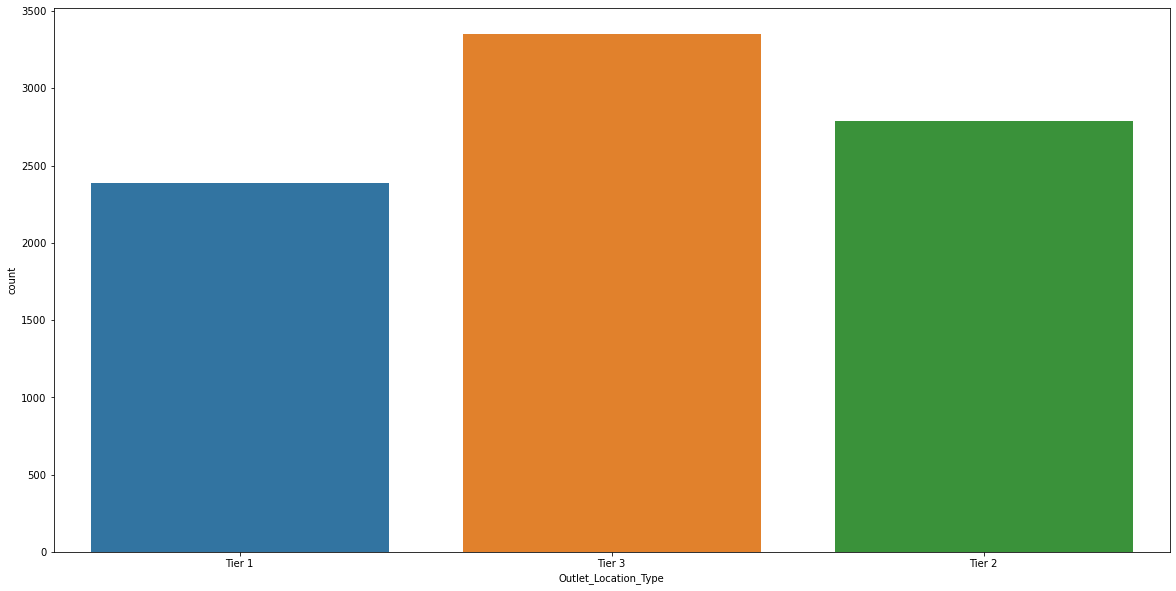

In [294]:
sns.countplot(df_train['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

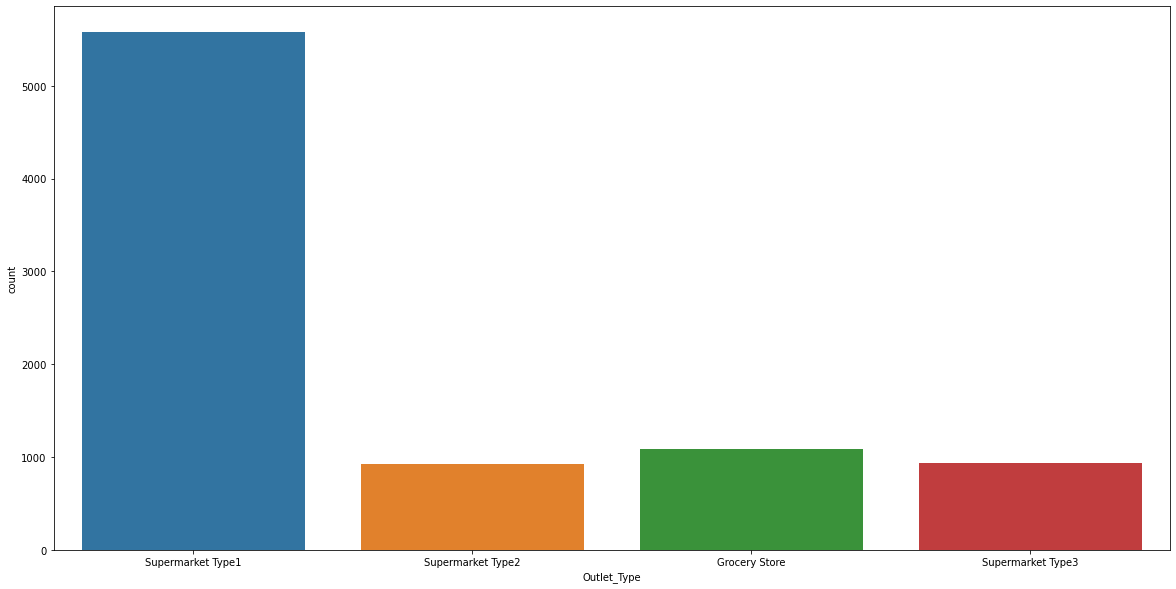

In [295]:
sns.countplot(df_train['Outlet_Type'])

## <span style='background :yellow' >To Check the skewness in data </span>

In [296]:
df_train.skew()

Item_Weight                  0.090561
Item_Visibility              1.286877
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales           -0.882266
dtype: float64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

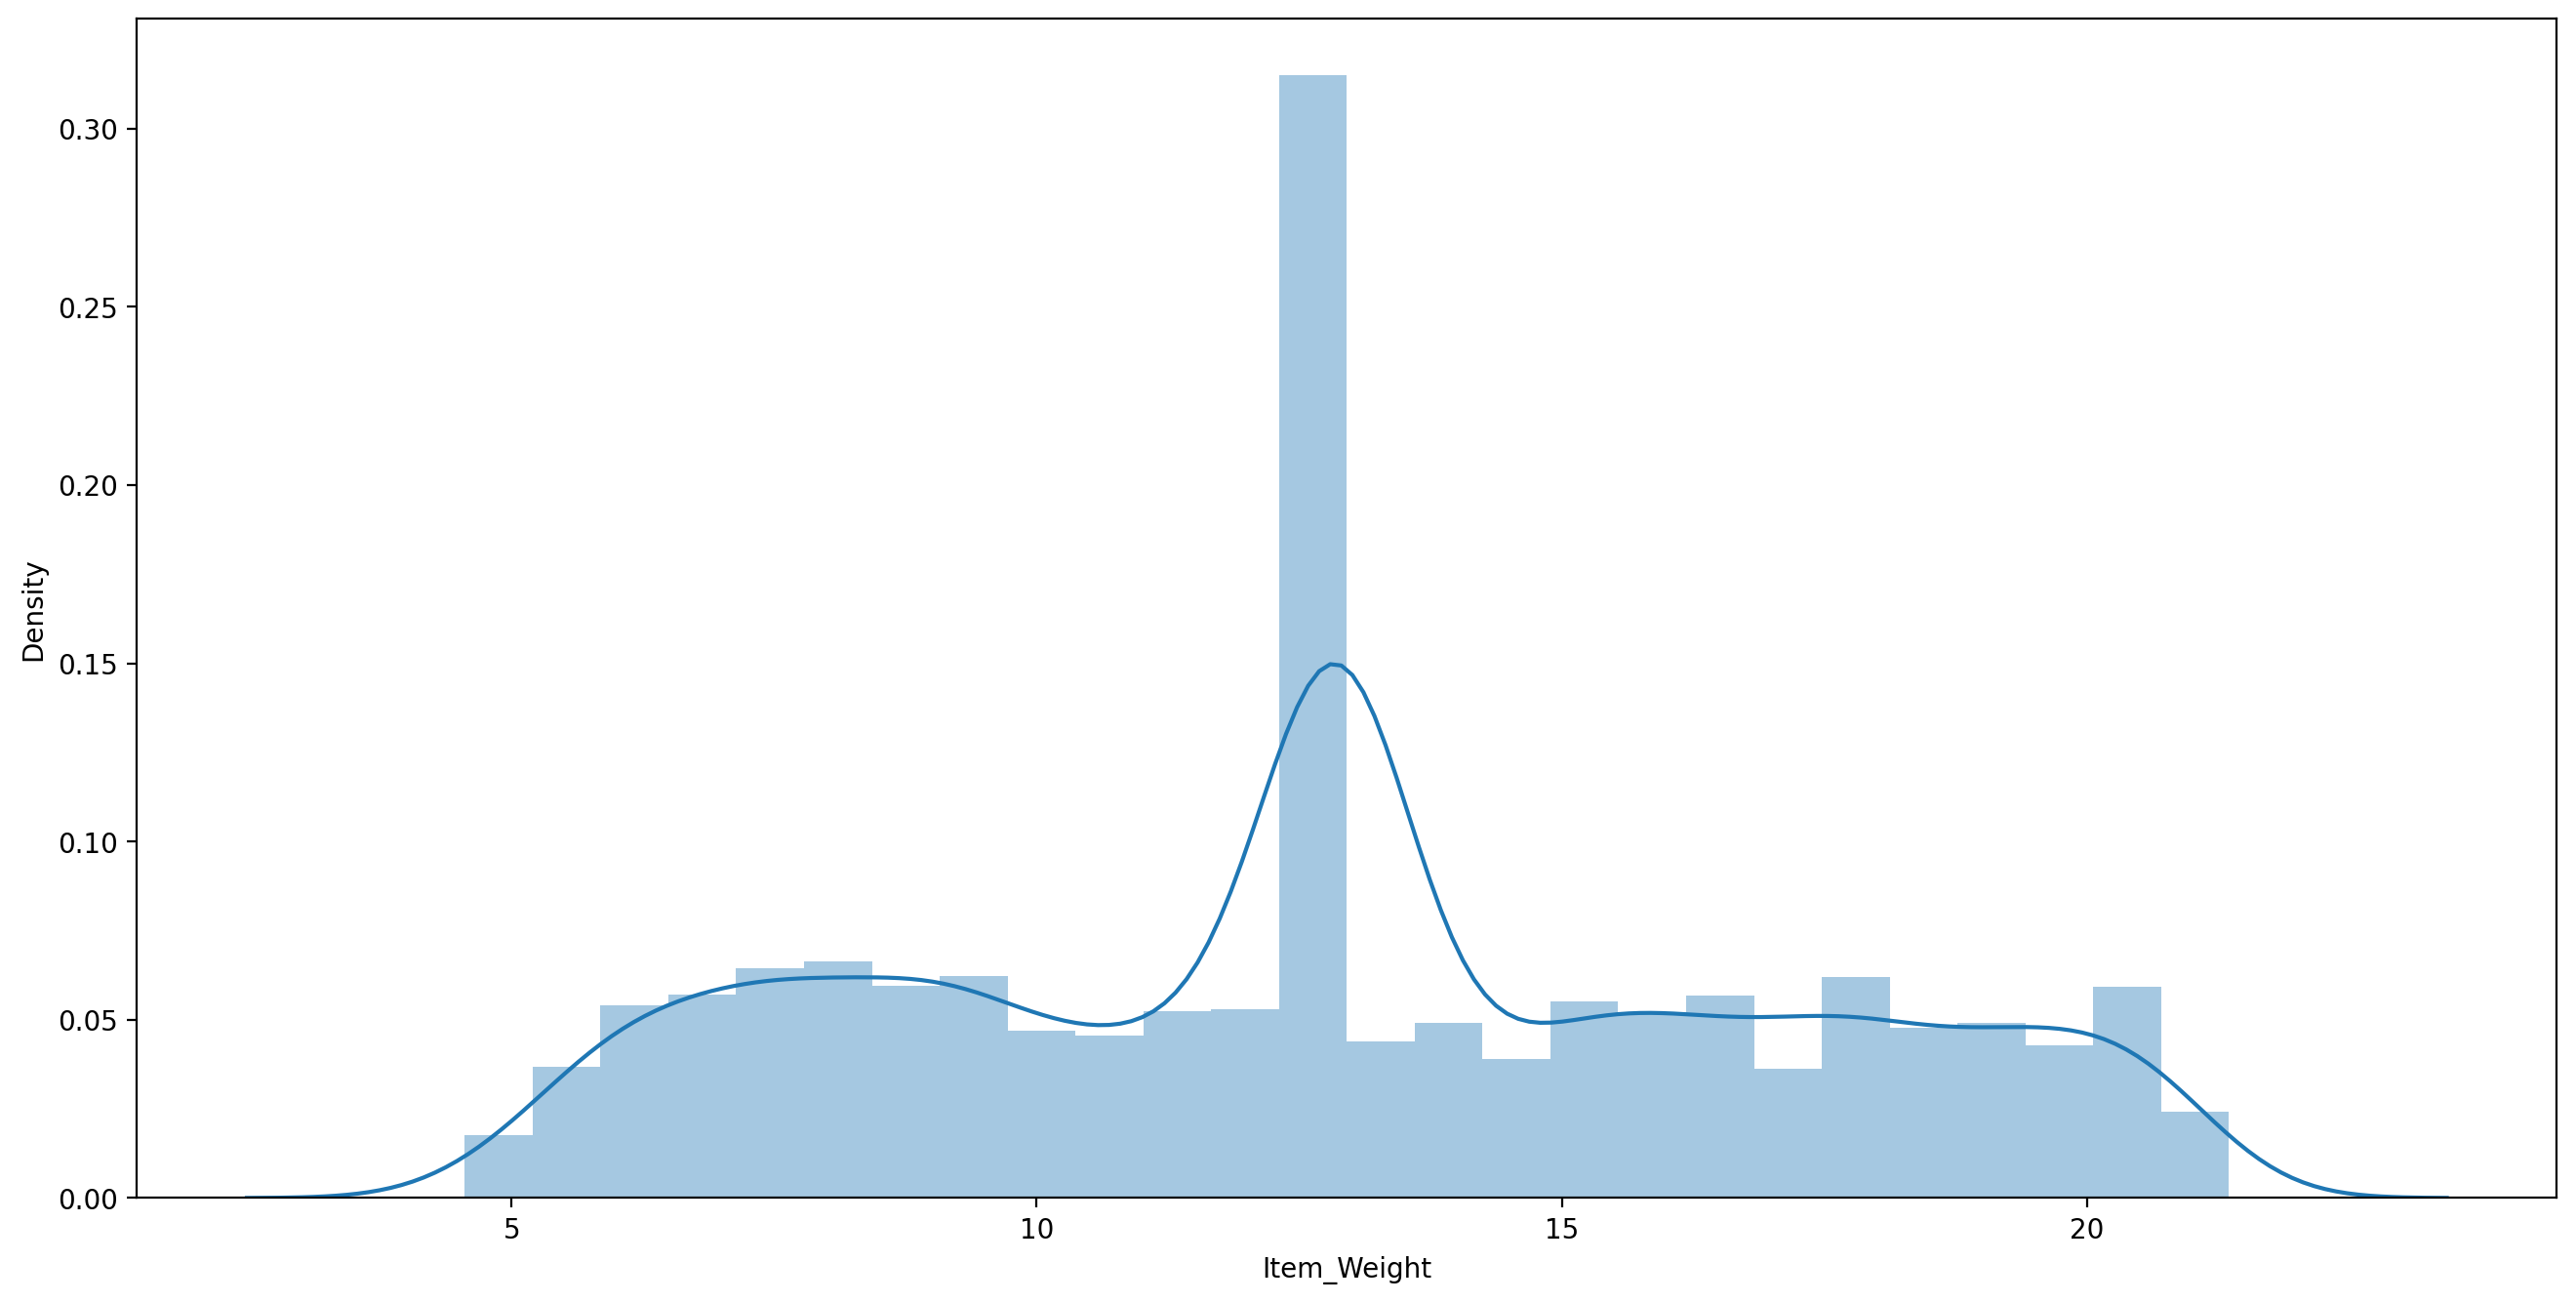

In [297]:
plt.figure(figsize=(16,8), dpi=200)
sns.distplot(df_train["Item_Weight"])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

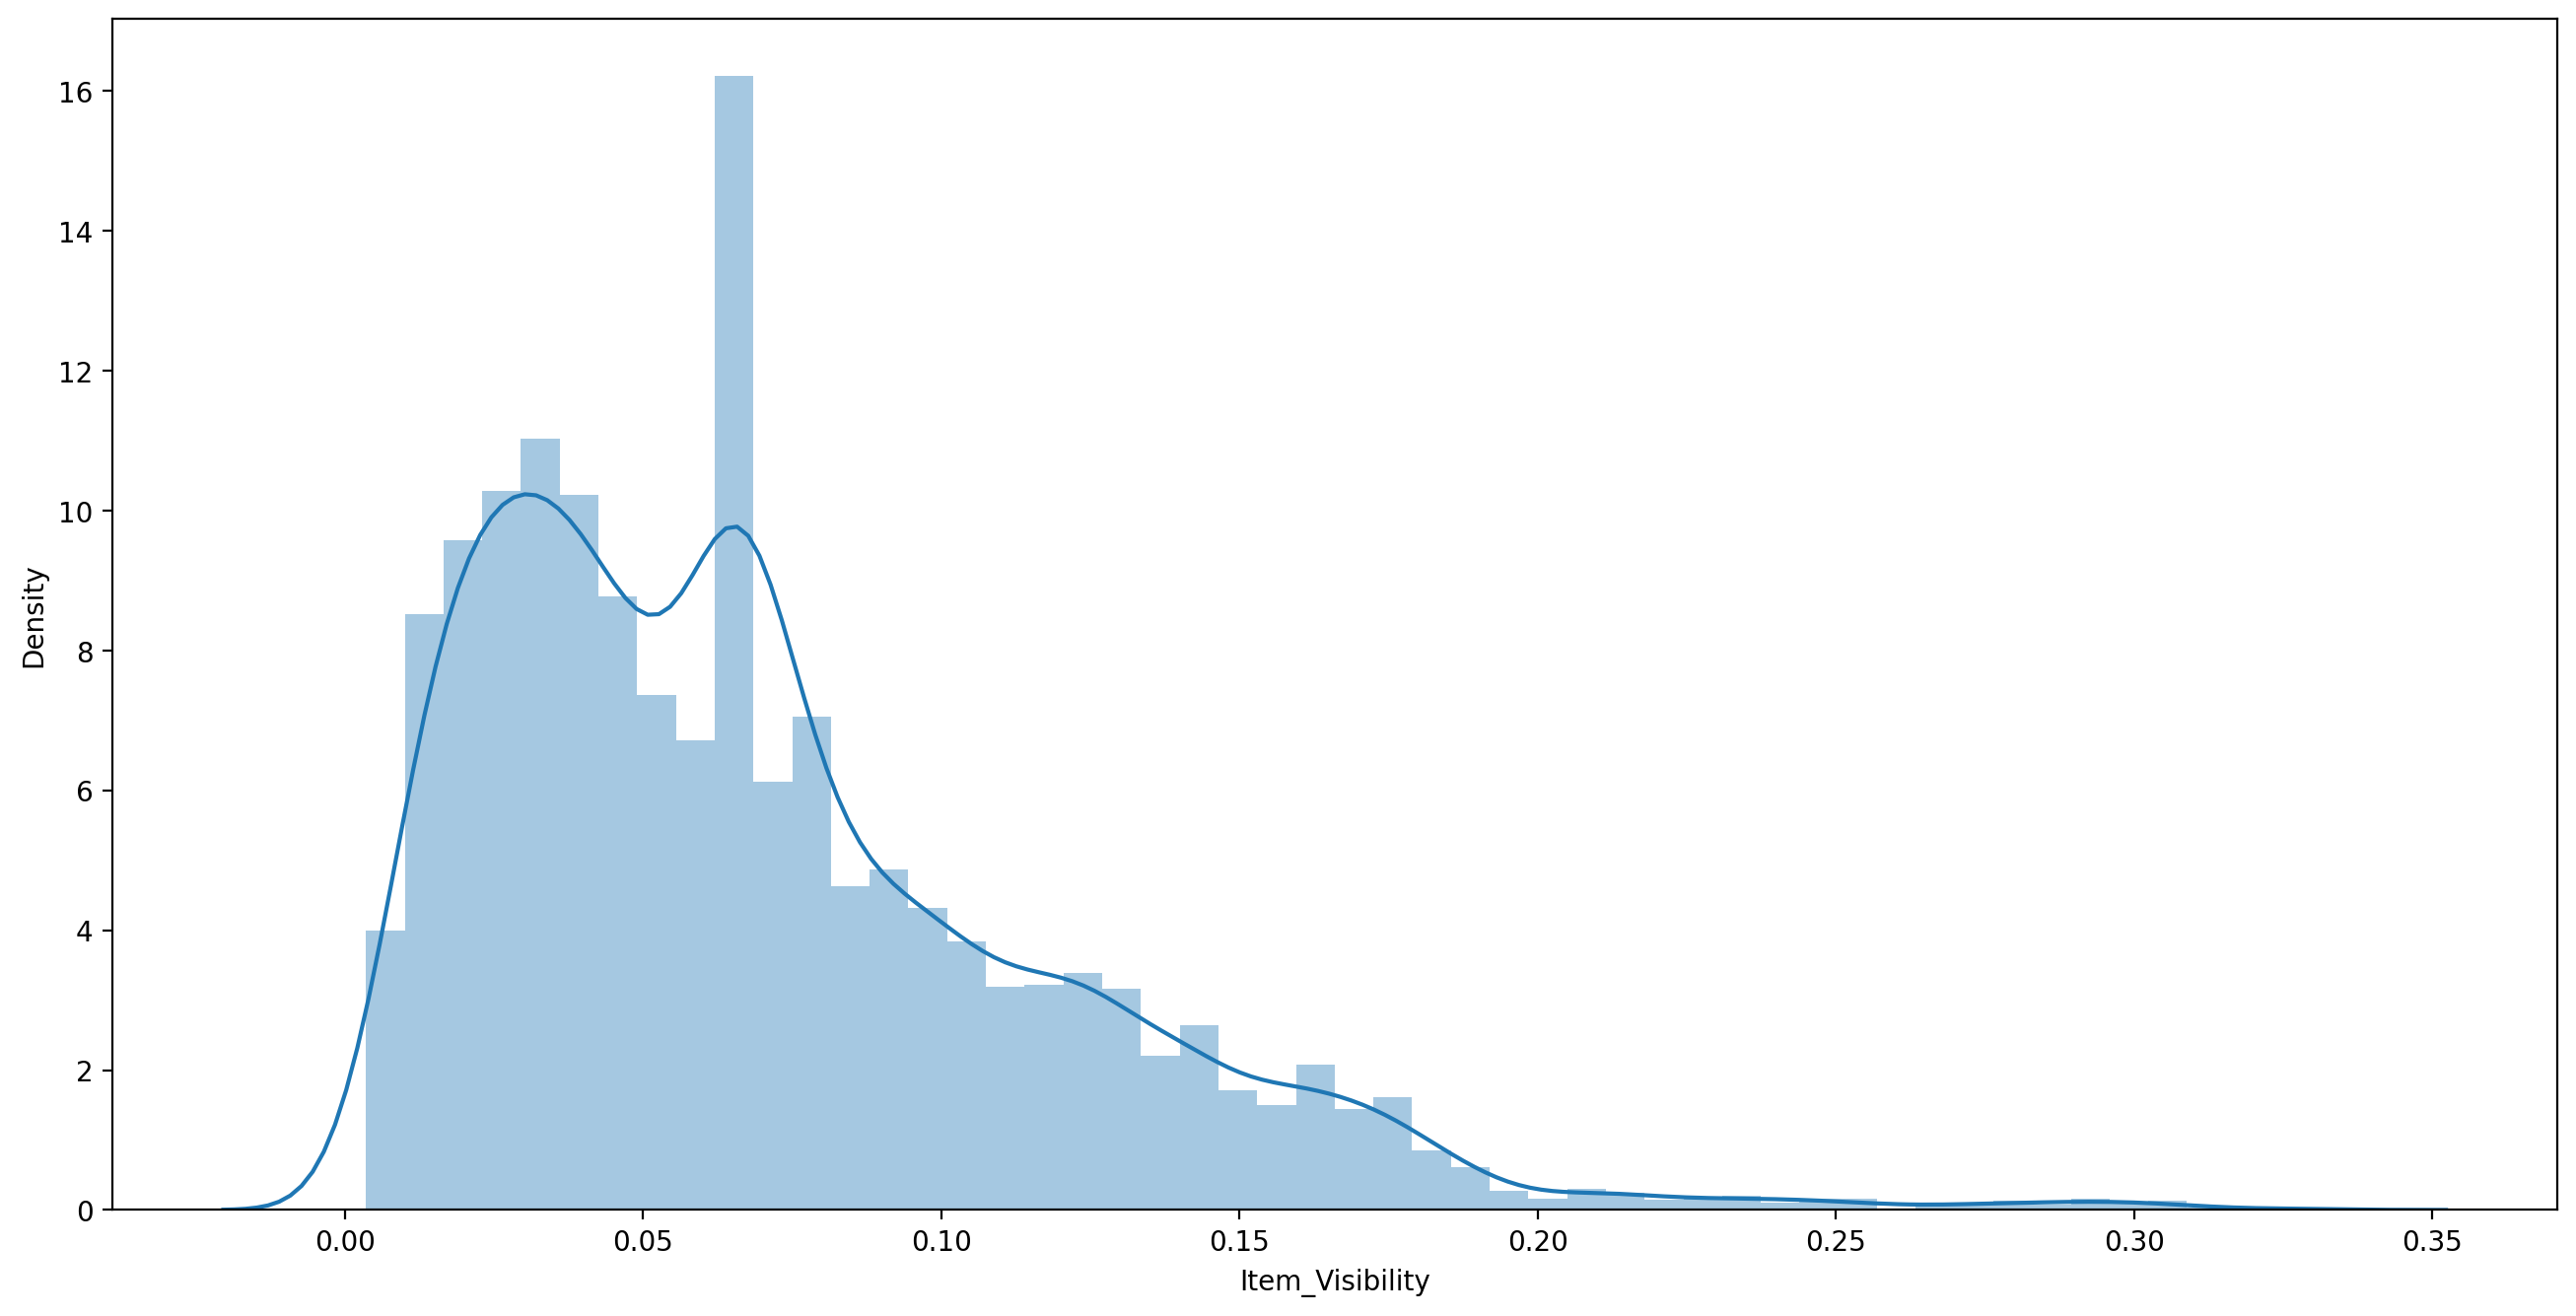

In [215]:
plt.figure(figsize=(16,8), dpi=200)
sns.distplot(df_train["Item_Visibility"])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

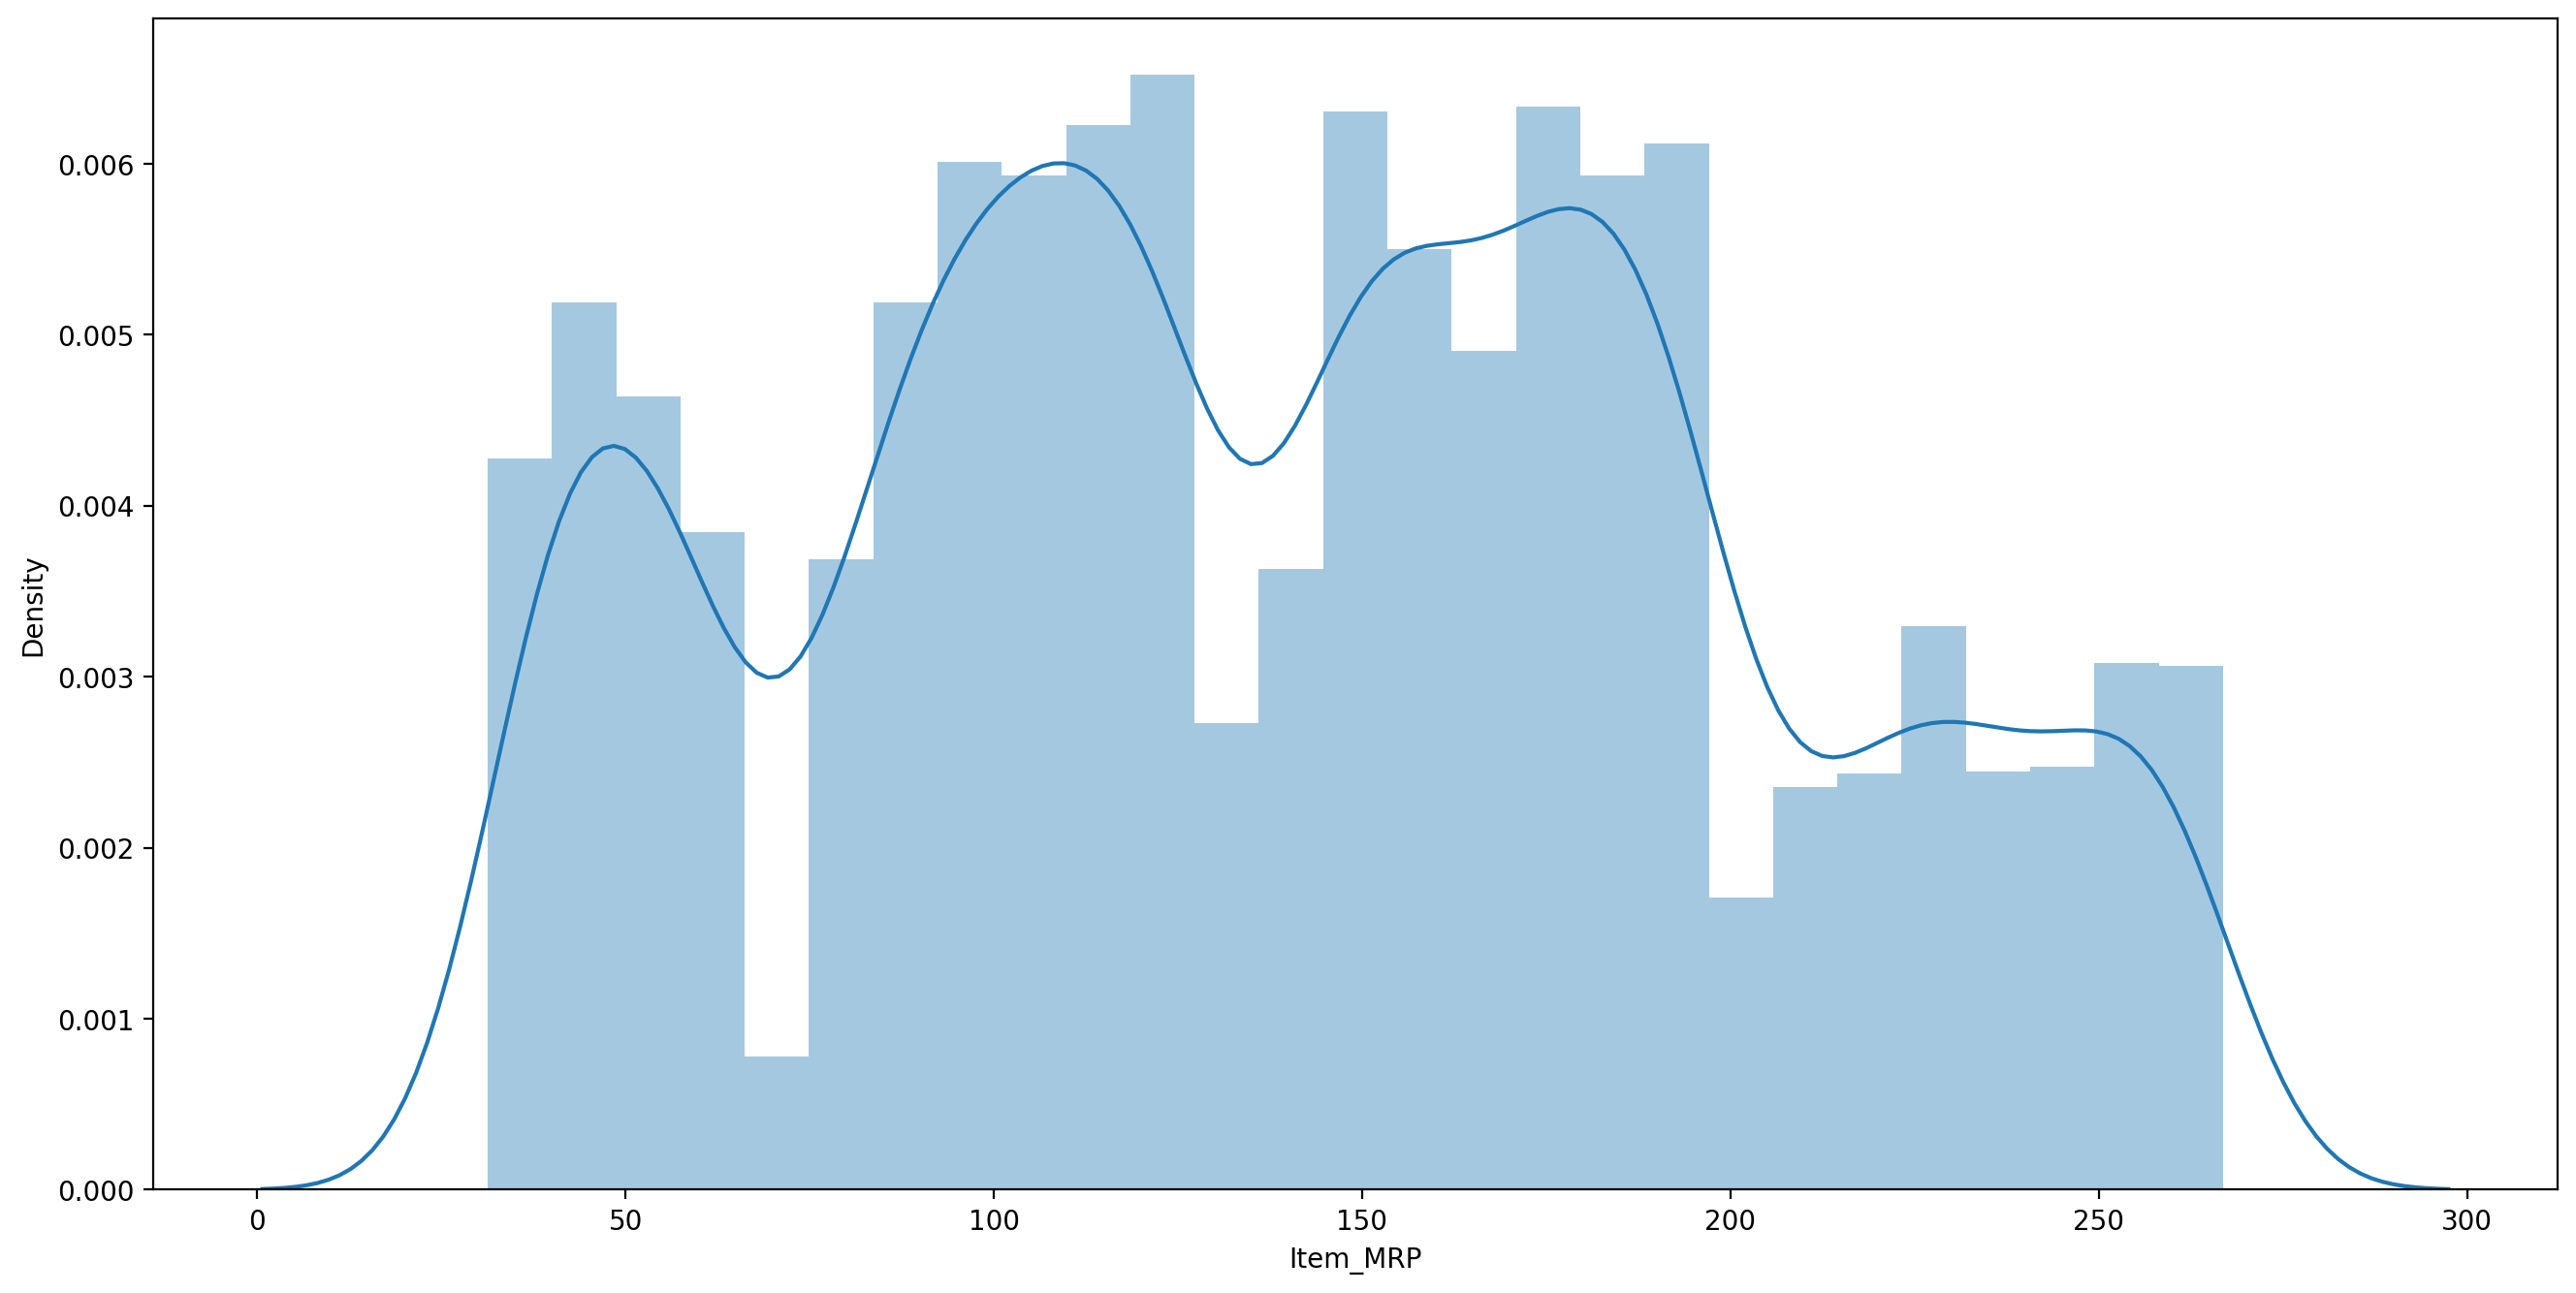

In [216]:
plt.figure(figsize=(16,8), dpi=200)
sns.distplot(df_train["Item_MRP"])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

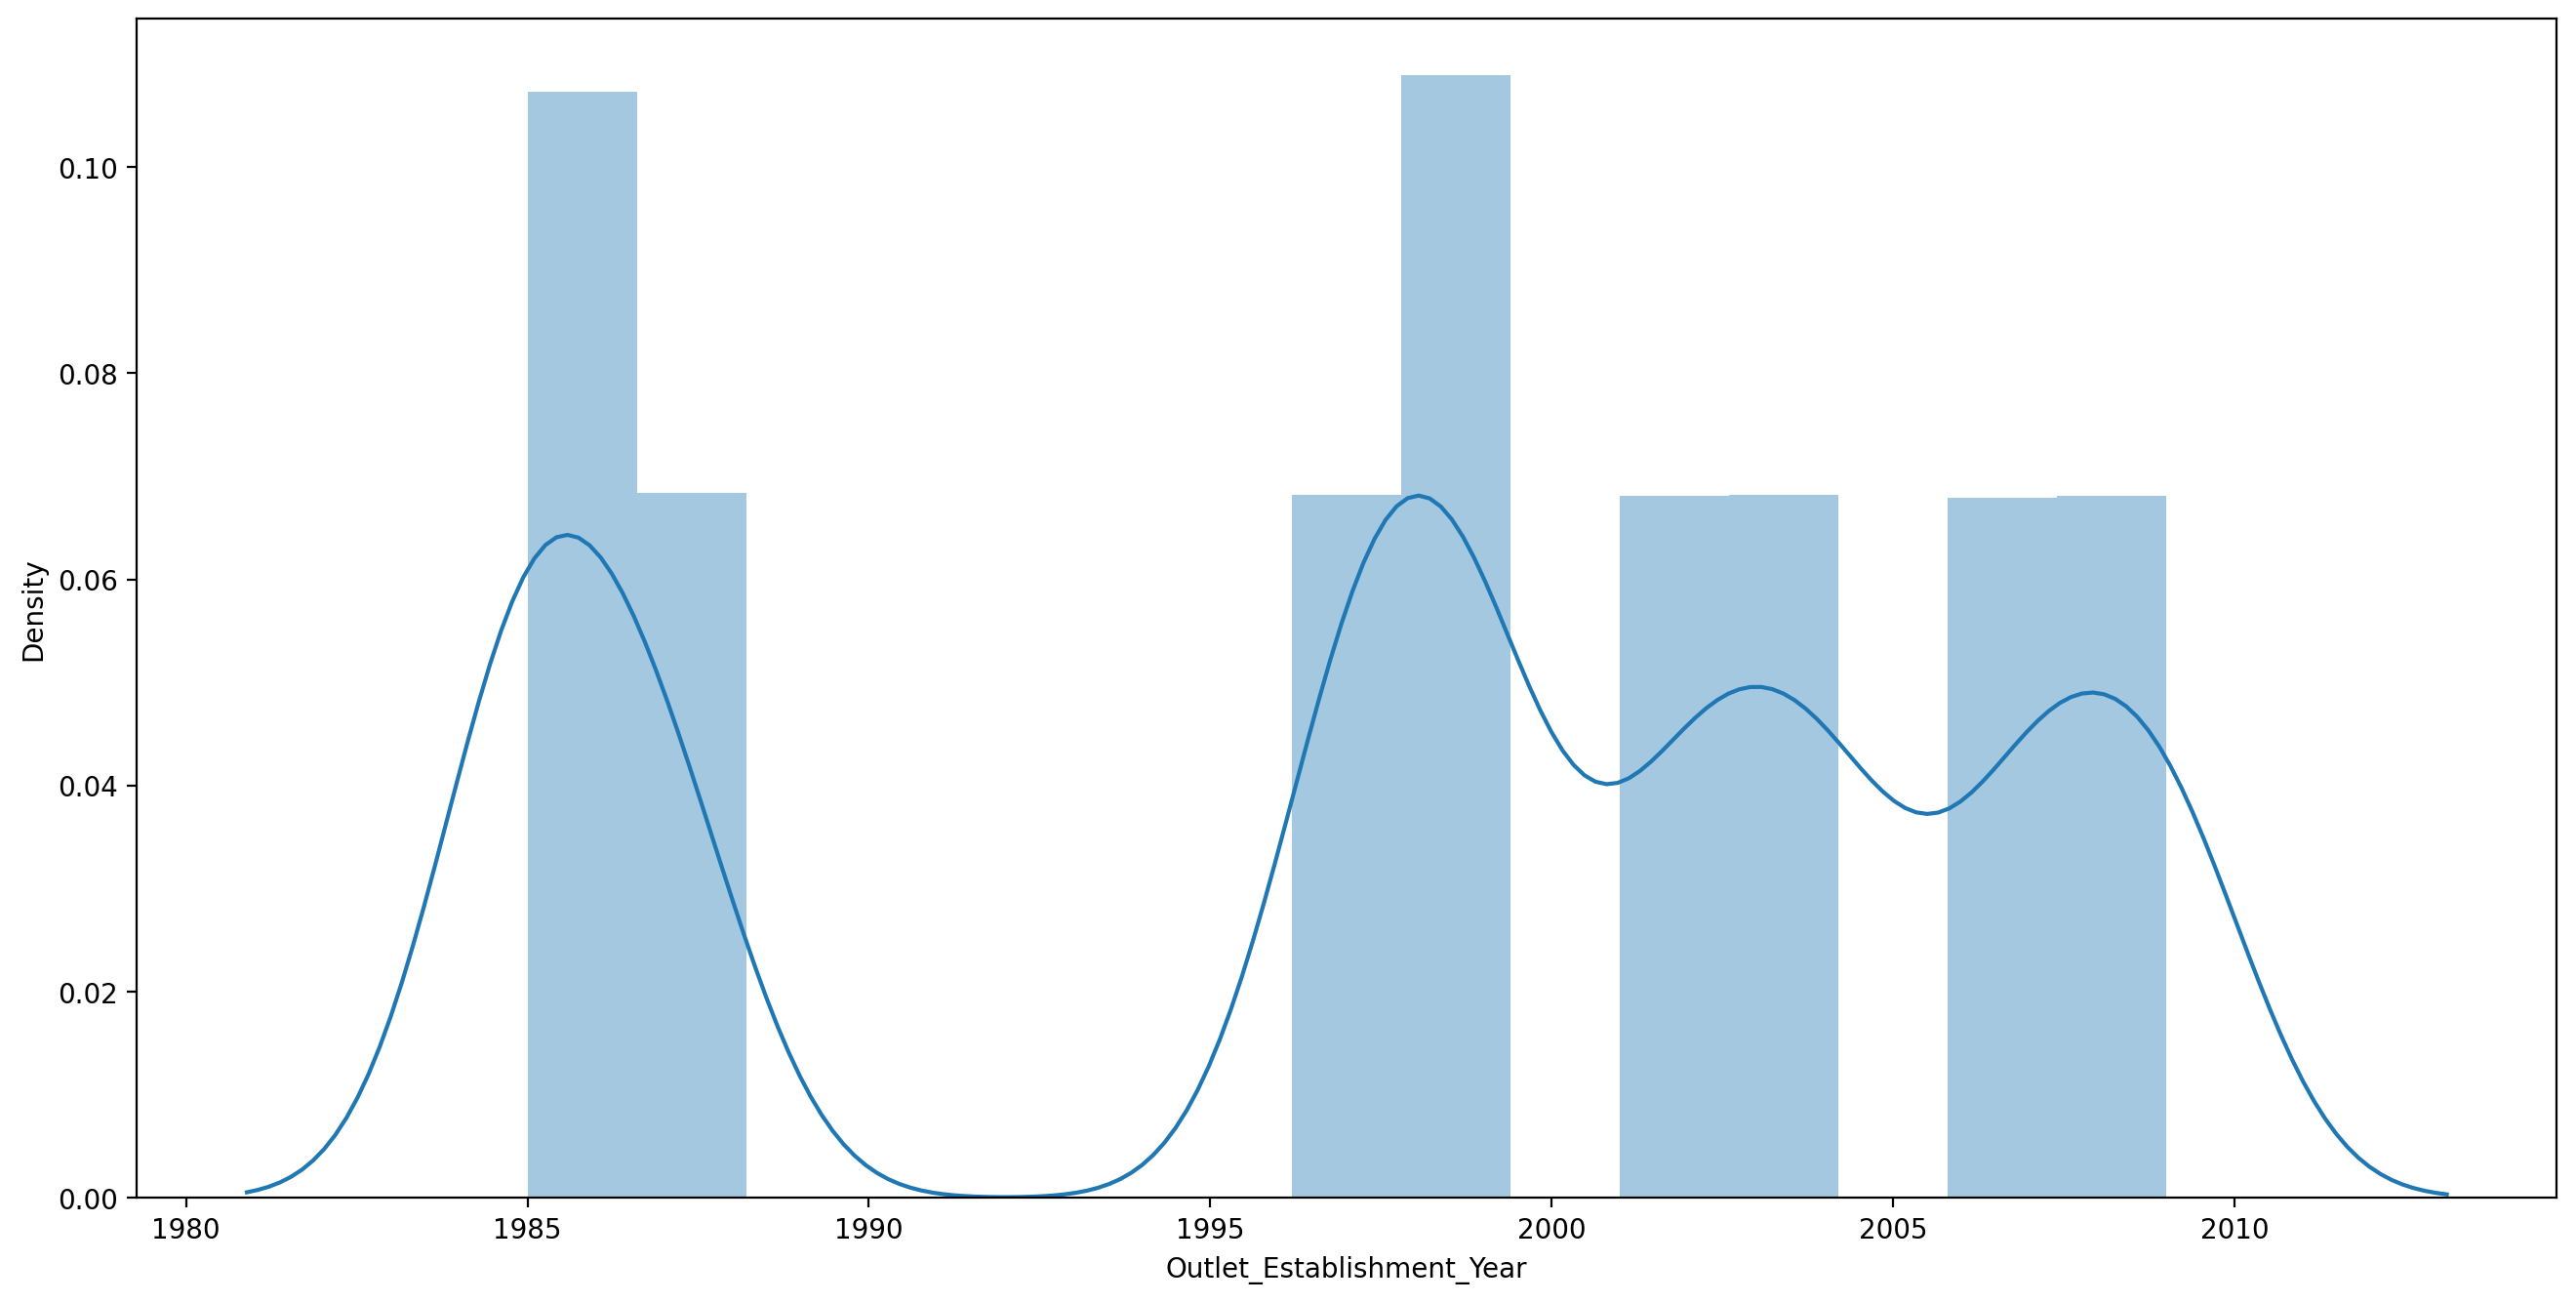

In [217]:
plt.figure(figsize=(16,8), dpi=200)
sns.distplot(df_train["Outlet_Establishment_Year"])

## <span style='background :yellow' > Checking the Correlation </span>

<AxesSubplot:>

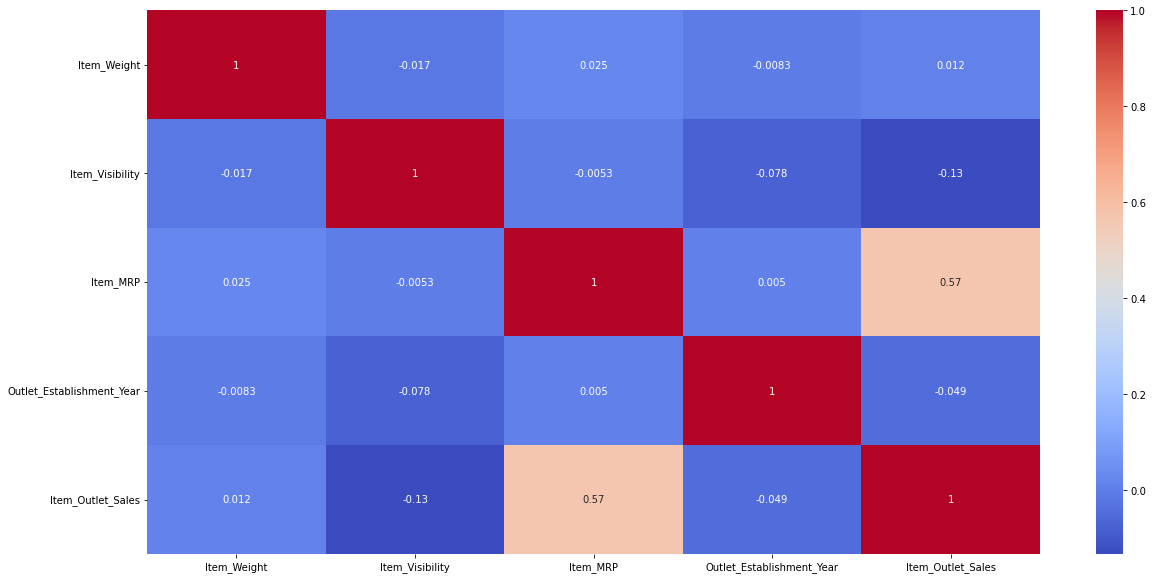

In [218]:
corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# To remove the skewness log transformation is used

In [219]:
df_train['Item_Outlet_Sales'] = np.log(1+df_train['Item_Outlet_Sales'])

In [298]:
df_train.corr()["Item_Outlet_Sales"].sort_values()

Item_Visibility             -0.202466
Item_Weight                  0.008059
Outlet_Establishment_Year    0.077032
Item_MRP                     0.509886
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

## <span style='background :yellow' >Label Encoder</span>

In [301]:
le = LabelEncoder()
df1 = df_train.copy()
df1.dropna(inplace=True)
for feature in categorical_features:
    df1[feature]=le.fit_transform(df1[feature])
x1=df1.iloc[:,:-1]  # Dropping last column from data frame
y1=df1.iloc[:,-1]

## <span style='background :yellow' >variance_inflation_factor</span>

In [302]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [303]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [304]:
calc_vif(x1)

,variables,VIF FACTOR
0,Item_Identifier,4.113057
1,Item_Weight,10.297060
2,Item_Fat_Content,4.736564
3,Item_Visibility,3.279313
4,Item_Type,3.976672
5,Item_MRP,9.733317
6,Outlet_Identifier,15.843669
7,Outlet_Establishment_Year,131.777944
8,Outlet_Size,7.908401
9,Outlet_Location_Type,15.334073


In [305]:
x1.drop('Outlet_Establishment_Year', inplace=True, axis=1)

In [226]:
df_train.skew()

Item_Weight                  0.090561
Item_Visibility              1.286877
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales           -0.882266
dtype: float64

## <span style='background :yellow' > Outlier </span>

Item_Identifier                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
Item_Weight                   AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Item_Fat_Content              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Item_Visibility               AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Item_Type                       AxesSubplot(0.125,0.518913;0.168478x0.16413)
Item_MRP                     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Outlet_Identifier            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Outlet_Establishment_Year    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Outlet_Size                     AxesSubplot(0.125,0.321957;0.168478x0.16413)
Outlet_Location_Type         AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Outlet_Type                  AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Item_Outlet_Sales            AxesSubplot(0.731522,0.321957;0.168478x0.16413)
New_Item_Type                      AxesSubplot(0.125,0.125;0.168478x0.16413)

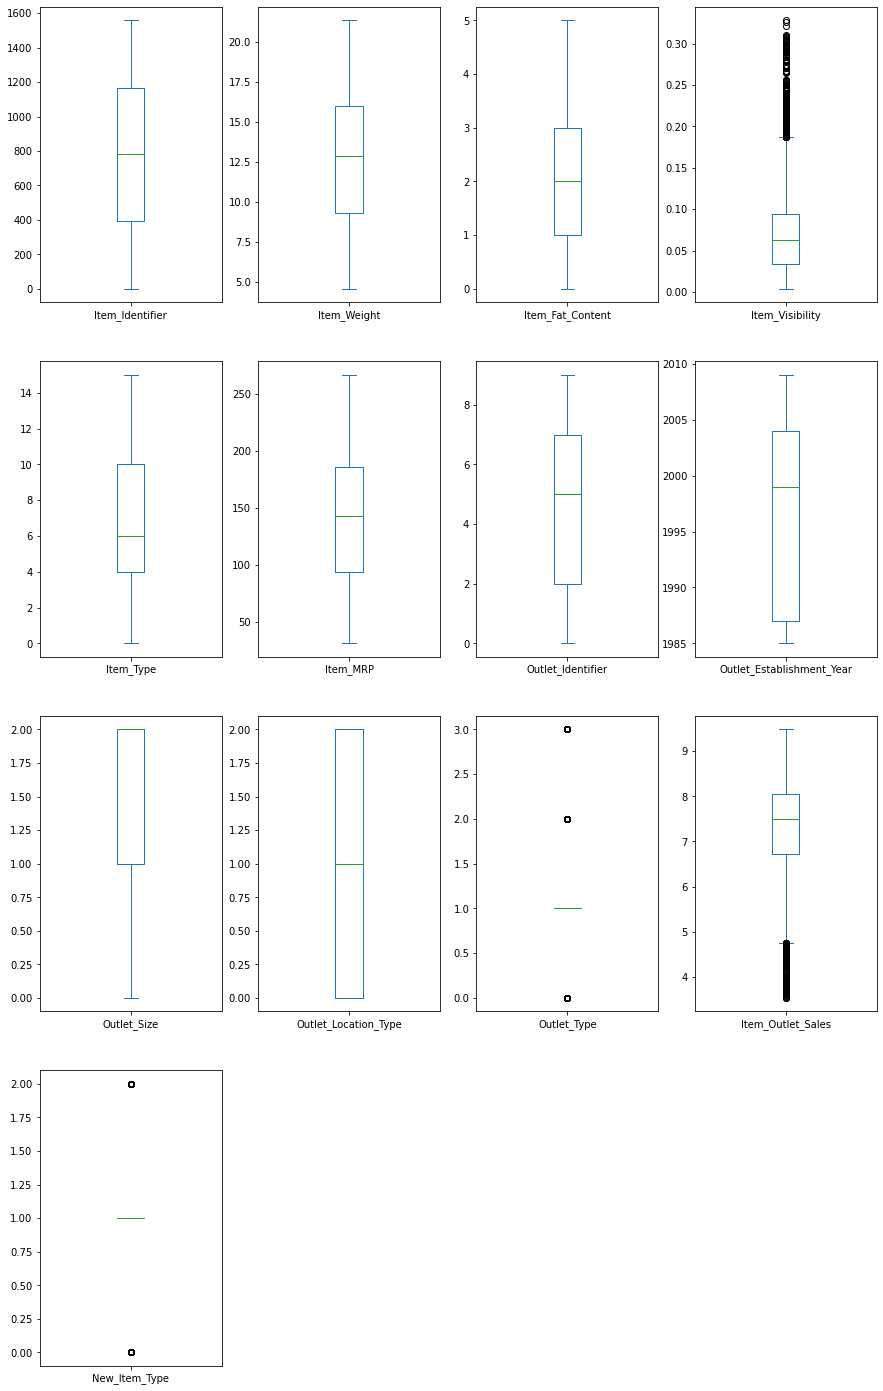

In [243]:
df1.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,25))

 ## <span style='background :yellow' >To Remove Outlier ZScore Method Is used</span>

In [307]:
z=np.abs(zscore(df1))
z

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,1.388514,0.841872,0.913017,1.111358,0.766479,1.747454,1.507813,0.139541,0.664080,1.369334,0.252658,0.914094,0.179795
1,1.717991,1.641706,1.063273,1.045067,1.608963,1.489023,0.607071,1.334103,0.664080,1.091569,1.002972,1.183160,2.095286
2,0.262057,1.098554,0.913017,1.096733,0.658786,0.010040,1.507813,0.139541,0.664080,1.369334,0.252658,0.345766,0.179795
3,0.759769,1.500838,1.063273,0.083740,0.291391,0.660050,1.664513,0.020085,0.799954,1.091569,1.508289,0.689748,0.179795
4,1.151580,0.929428,0.075128,0.083740,0.421242,1.399220,1.312032,1.293934,2.128115,1.091569,0.252658,0.388525,1.735696
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.912107,1.418084,0.913017,0.275551,1.371418,1.180783,1.312032,1.293934,2.128115,1.091569,0.252658,0.622686,0.179795
8519,0.261100,1.059578,1.063273,0.476643,1.716656,0.527301,0.802852,0.497909,0.799954,0.138882,0.252658,0.972689,0.179795
8520,1.285152,0.534243,0.075128,0.718672,0.183698,0.897208,0.450371,0.736822,0.799954,0.138882,0.252658,0.209529,1.735696
8521,0.219759,1.336444,1.063273,1.538968,1.371418,0.607977,0.607071,1.334103,0.664080,1.091569,1.002972,0.219905,0.179795


In [308]:
threshold=3
print(np.where(z>3))

(array([  49,   81,   83,  108,  151,  174,  178,  199,  255,  339,  396,
        405,  430,  434,  446,  489,  489,  502,  521,  532,  540,  574,
        615,  727,  753,  828,  838,  847,  854,  891,  906,  920, 1010,
       1034, 1090, 1124, 1133, 1159, 1183, 1209, 1272, 1291, 1311, 1311,
       1324, 1372, 1433, 1434, 1496, 1501, 1512, 1542, 1549, 1560, 1575,
       1576, 1615, 1617, 1644, 1651, 1684, 1723, 1753, 1769, 1805, 1827,
       1841, 1913, 2055, 2062, 2088, 2111, 2122, 2143, 2168, 2173, 2223,
       2251, 2324, 2324, 2331, 2337, 2394, 2438, 2439, 2445, 2552, 2569,
       2571, 2586, 2613, 2660, 2678, 2728, 2855, 2895, 2905, 2971, 2973,
       3011, 3017, 3053, 3163, 3206, 3225, 3241, 3242, 3243, 3247, 3283,
       3301, 3335, 3367, 3399, 3408, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3702, 3750, 3767, 3884, 3940, 3993,
       4006, 4019, 4083, 4163, 4219, 4219, 4245, 4265, 4280, 4290, 4297,
       4350, 4382, 4393, 4408, 4415, 4463, 4530, 4

In [309]:
z.iloc[11,11]

0.38708471275672285

In [310]:
z.shape

(8523, 13)

In [311]:
len(np.where(z>3)[0])

278

In [249]:
# removing outliers
df_new=df1[(z<3).all(axis=1)]
print("Old Dataframe",df1.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df1.shape[0] - df_new.shape[0])

Old Dataframe (8523, 13)
New Dataframe (8252, 13)
total_dropped_rows 271


# <span style='background :yellow' >Percentage Data Loss</span>

In [250]:
loss_percent=(4650-4613)/4650*100
print(loss_percent,'%')

0.7956989247311829 %


In [251]:
df_new.skew()

Item_Identifier             -0.010898
Item_Weight                  0.088450
Item_Fat_Content             0.129983
Item_Visibility              0.869039
Item_Type                    0.096734
Item_MRP                     0.126016
Outlet_Identifier           -0.074462
Outlet_Establishment_Year   -0.413977
Outlet_Size                 -0.836215
Outlet_Location_Type        -0.215631
Outlet_Type                  0.961247
Item_Outlet_Sales           -0.771109
New_Item_Type                0.105775
dtype: float64

Item_Identifier                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
Item_Weight                   AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Item_Fat_Content              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Item_Visibility               AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Item_Type                       AxesSubplot(0.125,0.518913;0.168478x0.16413)
Item_MRP                     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Outlet_Identifier            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Outlet_Establishment_Year    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Outlet_Size                     AxesSubplot(0.125,0.321957;0.168478x0.16413)
Outlet_Location_Type         AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Outlet_Type                  AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Item_Outlet_Sales            AxesSubplot(0.731522,0.321957;0.168478x0.16413)
New_Item_Type                      AxesSubplot(0.125,0.125;0.168478x0.16413)

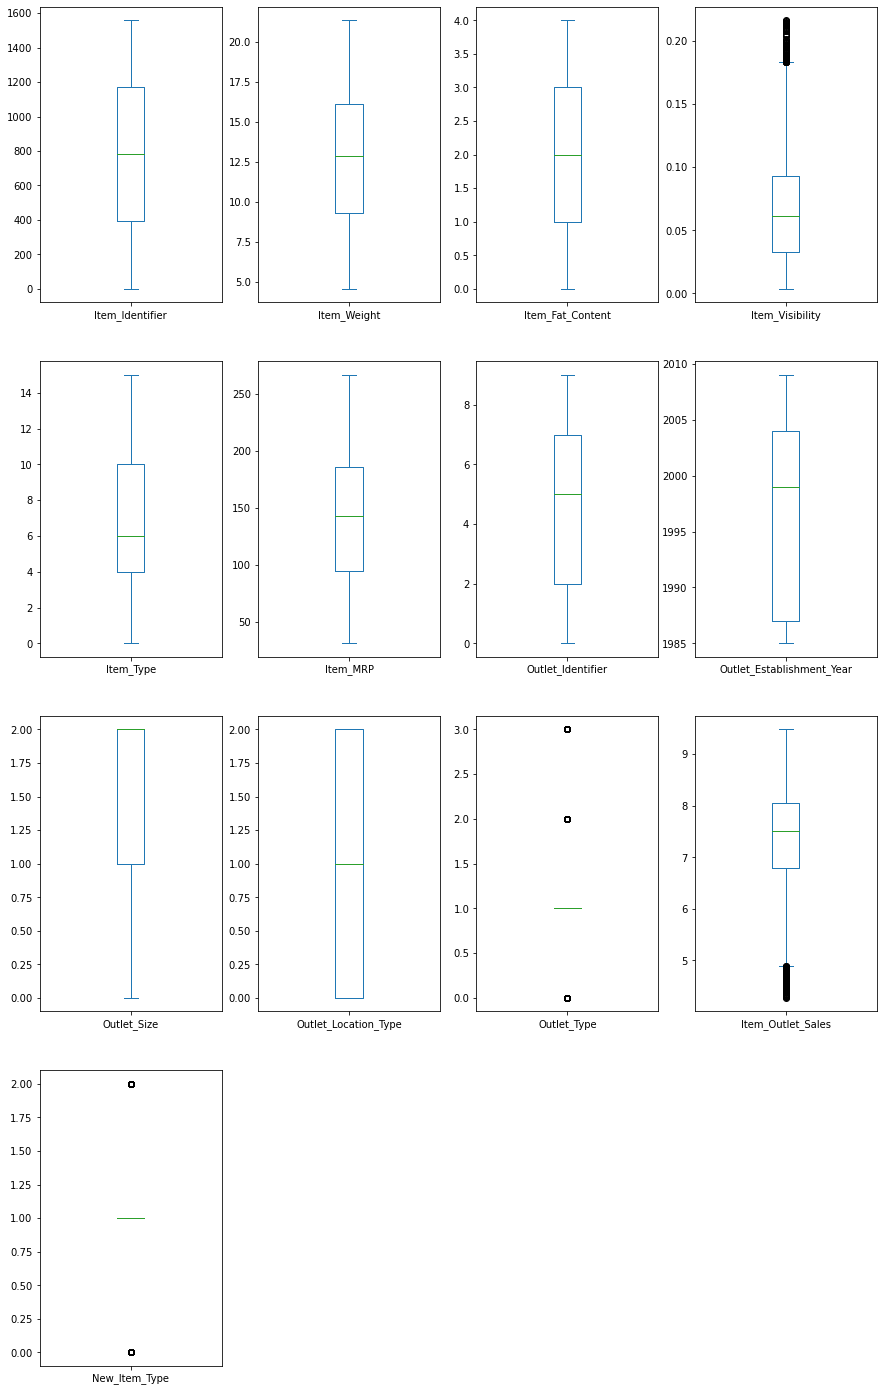

In [253]:
df_new.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,25))

#  <span style='background :yellow' > Splitting the data set</span>

In [254]:
X = df_new.iloc[:,:-2]
y = df_new.iloc[:,-2]

In [255]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,3,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,3,0.066132,6,182.0950,0,1998,2,2,0
4,1297,8.930,2,0.066132,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,3,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,2,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,3,0.145221,13,103.1332,3,2009,1,2,2


In [256]:
y

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8252, dtype: float64

In [257]:
X.skew().sort_values()

Outlet_Size                 -0.836215
Outlet_Establishment_Year   -0.413977
Outlet_Location_Type        -0.215631
Outlet_Identifier           -0.074462
Item_Identifier             -0.010898
Item_Weight                  0.088450
Item_Type                    0.096734
Item_MRP                     0.126016
Item_Fat_Content             0.129983
Item_Visibility              0.869039
Outlet_Type                  0.961247
dtype: float64

## <span style='background :yellow' >Scaling the independant variable (x) to get all the columns in a standard scale</span>


In [267]:
sc=StandardScaler()
x1=sc.fit_transform(X)
x1

array([[-1.38540978, -0.83895542, -0.92655739, ..., -0.64793655,
        -1.3820046 , -0.28460717],
       [-1.7135175 , -1.63542075,  1.17947527, ..., -0.64793655,
         1.0926188 ,  0.98420879],
       [-0.26363608,  1.09329775, -0.92655739, ..., -0.64793655,
        -1.3820046 , -0.28460717],
       ...,
       [ 1.27714005, -0.5326226 ,  0.12645894, ...,  0.81133539,
        -0.1446929 , -0.28460717],
       [-0.22151414, -1.33144434,  1.17947527, ..., -0.64793655,
         1.0926188 ,  0.98420879],
       [-1.62040585,  0.45706805, -0.92655739, ...,  0.81133539,
        -1.3820046 , -0.28460717]])

In [268]:
X.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [269]:
x = pd.DataFrame(x1,columns=X.columns)

## <span style='background :yellow' > Machine Learning Model</span>

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [271]:
lr = LinearRegression()

In [272]:
lr_acc = pd.DataFrame()

In [273]:
lr_acc['random_state'] = random_state[:198]
lr_acc['training_accuracy'] = training_accuracy[:198]
lr_acc['testing_accuracy'] = testing_accuracy[:198]

In [274]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    random_state.append(i)
    training_accuracy.append(round(r2_score(y_train,pred_train), 2))
    testing_accuracy.append(round(r2_score(y_test,pred_test), 2))

In [275]:
lr_acc = pd.DataFrame()

In [276]:
lr_acc['random_state'] = random_state[:198]
lr_acc['training_accuracy'] = training_accuracy[:198]
lr_acc['testing_accuracy'] = testing_accuracy[:198]

In [277]:
lr_acc.sort_values('testing_accuracy').tail(1)

,random_state,training_accuracy,testing_accuracy
29,30,0.54,0.58


In [ ]:
For random test 29 accuracy is 0.51 

## <span style='background :yellow' > Machine Learning Model Prediction

In [280]:
def regressor(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=97)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

#  <span style='background :yellow' > Tuning parameter for better results</span>

## 1.Random Forest Regressor

In [283]:

model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.5342182293461694
R2 Score is: 67.96686599493444
Cross Validation Score is: 67.20261282284416
R2 Score - Cross Validation Score is 0.7642531720902781


# 2.K Neighbors Regressor

In [284]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.5719409839702848
R2 Score is: 63.283230775793406
Cross Validation Score is: 63.08754226193477
R2 Score - Cross Validation Score is 0.1956885138586344


# 3.SGD Regressor¶

In [285]:
model=SGDRegressor(penalty='l1', learning_rate='optimal')
regressor(model, x, y)

Root Mean Square Error is: 0.6663030213826577
R2 Score is: 50.168313156646875
Cross Validation Score is: 49.538712217602935
R2 Score - Cross Validation Score is 0.6296009390439394


# 4.Gradient Boosting Regressor¶

In [286]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.49803093034355167
R2 Score is: 72.15965232064586
Cross Validation Score is: 70.93772656572602
R2 Score - Cross Validation Score is 1.2219257549198375


# 5.Ada Boost Regressor

In [287]:
model=AdaBoostRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 0.5712767251327444
R2 Score is: 63.36846780562375
Cross Validation Score is: 65.41927062124574
R2 Score - Cross Validation Score is -2.050802815621992


# 6.K Neighbors Regressor

In [288]:
model=AdaBoostRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 0.5712767251327444
R2 Score is: 63.36846780562375
Cross Validation Score is: 65.41927062124574
R2 Score - Cross Validation Score is -2.050802815621992


## <span style='background :yellow' > Hyper parameter tuning</span>

In [319]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=97)

## 1.For Lasso

In [323]:
parameters = {'alpha':[100, 300], 'selection': ['cyclic', 'random'], 'max_iter': [500, 1000], 'random_state': [100, 500]}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)


ls=Lasso(alpha=100,random_state=100,max_iter=500,selection='cyclic')
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

ls1 = r2_score(y_test,pred_ls)
ls1


cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

{'alpha': 100, 'max_iter': 500, 'random_state': 100, 'selection': 'cyclic'}


-0.0006324411002697428

## 2.For Gradient Boosting

In [325]:
clf_gb=GridSearchCV(estimator=GradientBoostingRegressor(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [500]})

In [326]:
clf_gb.best_score_

0.6927097026800314

In [327]:
clf_gb.best_params_

{'n_estimators': 500}

In [328]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,3.811017,0.05499,0.006273,0.005625,500,{'n_estimators': 500},0.680145,0.743259,0.693742,0.670977,0.673526,0.705591,0.695145,0.707278,0.669961,0.687471,0.69271,0.021174,1


# 3.GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
RandomForestRegressor().get_params

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [ ]:
GCV = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, cv = 5)
GCV.fit(x_train, y_train)

In [ ]:
GCV.best_params_

# 4.RandomForestRegresson

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='mae')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))

In [ ]:
cvs = cross_val_score(rfr, x, y, cv = 5)
print ('Cross Validation Score for Random forest model after hypertuning is :', cvs.mean())

### Consumption of Snack Foods, Fruits, Vegetables, Dairy, Frozen Foods, Canned and Household is more, compared to all other items, if we increase visibility of these items, we can increase sales


### Low consumption of breakfast, Seafood, Starchy Foods, So we need less visibility for th